In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv("students by age.csv",delimiter=';',encoding='cp1251')
df

,age,name,man,woman
0,моложе 15 лет,Алтайский край,0,0
1,моложе 15 лет,Амурская область,0,0
2,моложе 15 лет,Архангельская область,0,0
3,моложе 15 лет,Астраханская область,0,0
4,моложе 15 лет,Белгородская область,1,0
...,...,...,...,...
1591,40 лет и старше,Чеченская Республика,193,130
1592,40 лет и старше,Чувашская Республика,637,683
1593,40 лет и старше,Чукотский автономный округ,4,2
1594,40 лет и старше,Ямало-Ненецкий автономный округ,15,1


In [3]:
# defining two arrays with the name of the unique age groups and the unique regions
ages = df.age.unique()
regions= df.name.unique()
regions.shape

(84,)

In [4]:
# taking columns number [1,2,3,4] of the dataset into a numpy array
X = df.iloc[:,[0,1,2,3]].values
# defining a dictionary with the key "age" which contains an array of the required age groups for
# this study (15-29) and the key "val" which represents the number of students of an age group in whole Russia
d ={"age": np.linspace(15,29,15),"val":np.zeros(15)}

for i in range(1596):
    ID=int(np.where(ages== X[i,0])[0])
    if ID>0 and ID<16:
        d["val"][ID-1]=(float(X[i,2]+X[i,3]))+d["val"][ID-1]
d = pd.DataFrame(d)
d

,age,val
0,15.0,59.0
1,16.0,2680.0
2,17.0,84120.0
3,18.0,442103.0
4,19.0,504794.0
5,20.0,565739.0
6,21.0,564847.0
7,22.0,456060.0
8,23.0,355615.0
9,24.0,221301.0


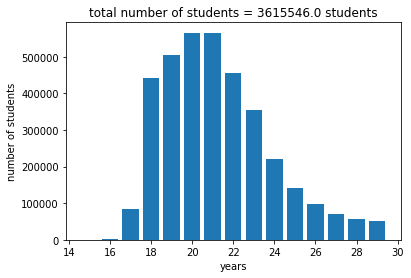

In [10]:
# distribution plot
leg = d["val"].sum()
plt.bar(d.age, d.val)
plt.title("total number of students = {} students".format(leg))
plt.xlabel("years")
plt.ylabel("number of students")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

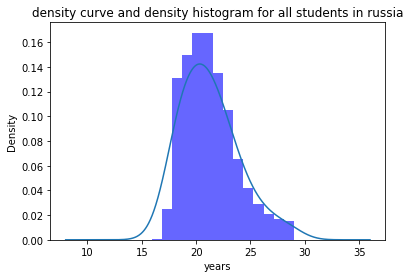

In [11]:
#density curve
a = pd.Series(d.age.repeat(d.val))
a.plot.kde(bw_method=0.5)
plt.hist(a,bins=15,  density=True, alpha=0.6, color='b')
plt.title("density curve and density histogram for all students in russia")
plt.xlabel("years")
plt.show

In [6]:
# create a data frame for male and female students
X = df.iloc[:,[0,1,2,3]].values
d ={"age": np.linspace(15,29,15),"men":np.zeros(15),"women":np.zeros(15)}

for i in range(1596):
    ID=int(np.where(ages== X[i,0])[0])
    if ID>0 and ID<16:
        d["men"][ID-1]=(float(X[i,2]))+d["men"][ID-1]
        d["women"][ID-1]=(float(X[i,3]))+d["women"][ID-1]
d = pd.DataFrame(d)

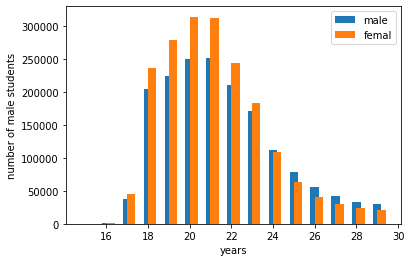

In [12]:
plt.bar(d.age, d.men,align="center",width=0.4,label="male")
plt.bar(d.age,d.women,align="edge",width=0.4,label="femal")
plt.xlabel("years")
plt.ylabel("number of male students")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

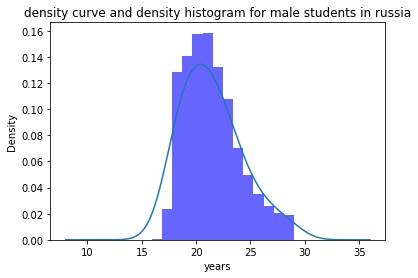

In [14]:
a = pd.Series(d.age.repeat(d.val))
a.plot.kde(bw_method=0.5)
plt.hist(a,bins=15,  density=True, alpha=0.6, color='b')
plt.title("density curve and density histogram for male students in russia")
plt.xlabel("years")
plt.show

In [55]:
X = df.iloc[:,[0,1,2,3]].values
d ={"age": np.linspace(15,29,15),"val":np.zeros(15)}

for i in range(1596):
    ID=int(np.where(ages== X[i,0])[0])
    if ID>0 and ID<16:
        d["val"][ID-1]=(float(X[i,3]))+d["val"][ID-1]
d = pd.DataFrame(d)

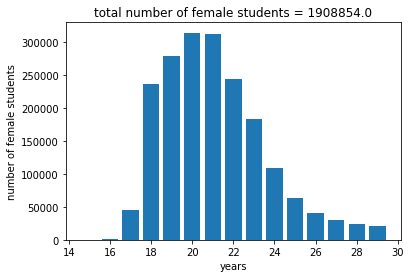

In [56]:
leg = d["val"].sum()
plt.bar(d.age, d.val)
plt.title("total number of female students = {}".format(leg))
plt.xlabel("years")
plt.ylabel("number of female students")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

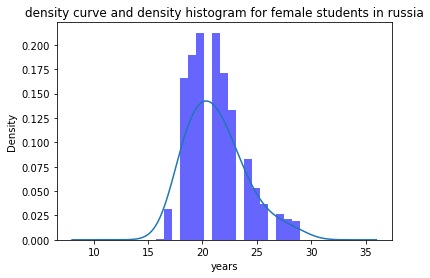

In [5]:
a = pd.Series(d.age.repeat(d.val))
a.plot.kde(bw_method=0.5)
plt.hist(a,bins=19,  density=True, alpha=0.6, color='b')
plt.title("density curve and density histogram for female students in russia")
plt.xlabel("years")
plt.show